In [1]:
from train_shap import get_model_data_for_shap, ModelReversingY, get_data_for_Shap
import shap
# beA3o82D_1112_1_all
fmodel, params, pp, fp= get_model_data_for_shap('trainshap_timeseries.yaml', 'beA3o82D', 1112)


/root/.conda/envs/nni/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-02 22:25:59.750 | INFO     | preprocessor:_dropna:155 - Dropping NaN values
2024-10-02 22:25:59.909 | INFO     | preprocessor:_dropna:174 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute'

[0]	train-rmsle:1.31738	train-roc_auc:0.66434	validation-rmsle:1.28889	validation-roc_auc:0.63822
[1]	train-rmsle:1.27588	train-roc_auc:0.66434	validation-rmsle:1.24846	validation-roc_auc:0.63822
[2]	train-rmsle:1.23595	train-roc_auc:0.69209	validation-rmsle:1.20919	validation-roc_auc:0.67436
[3]	train-rmsle:1.19756	train-roc_auc:0.69209	validation-rmsle:1.17196	validation-roc_auc:0.67436
[4]	train-rmsle:1.16076	train-roc_auc:0.69209	validation-rmsle:1.13637	validation-roc_auc:0.67436
[5]	train-rmsle:1.12560	train-roc_auc:0.69209	validation-rmsle:1.10245	validation-roc_auc:0.67436
[6]	train-rmsle:1.09216	train-roc_auc:0.72105	validation-rmsle:1.06999	validation-roc_auc:0.70463
[7]	train-rmsle:1.06034	train-roc_auc:0.72105	validation-rmsle:1.03950	validation-roc_auc:0.70463
[8]	train-rmsle:1.03028	train-roc_auc:0.72313	validation-rmsle:1.01021	validation-roc_auc:0.70754
[9]	train-rmsle:1.00186	train-roc_auc:0.73486	validation-rmsle:0.98301	validation-roc_auc:0.71376
[10]	train-rmsle:0.9

In [2]:
# save fmodel
import joblib
joblib.dump(fmodel, 'fmodel.pkl')


['fmodel.pkl']

In [3]:
# load fmodel
fmodel = joblib.load('fmodel.pkl')

In [23]:
X = get_data_for_Shap(fmodel, fp, params.copy(), pp, k = 2.5, randomrate= 0.1)

model = ModelReversingY(fmodel, params)

2024-10-02 22:43:50.945 | INFO     | preprocessor:_dropna:155 - Dropping NaN values
2024-10-02 22:43:51.156 | INFO     | preprocessor:_dropna:174 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute', 'Mugwort_Avg_chronic',
       'Salmon_Avg_preclinical', 'Salmon_Avg_acute', 'Salmon_Avg_chronic'],
      dtype='object', length=233)
2024-10-02 22:43:51.159 | INFO     | preprocessor:_imputation:186 - Imputing missing values
2024-10-02 22:43:51.778 | INF

In [28]:
# identify the count of imputation values
# for each feature the most frequent value is seen as imputation value
# for each row count the number of imputation values and remove the row if the count is higher than half of the number of features
import pandas as pd

df = pd.DataFrame(X)
# Step 1: Find the most frequent value for each feature (column)
imputation_values = df.mode().iloc[0]  # Get the first mode for each feature

# Step 2: For each row, count how many values match the imputation values
def count_imputed_values(row, imputation_values):
    return sum(row == imputation_values)

df['imputed_count'] = df.apply(lambda row: count_imputed_values(row, imputation_values), axis=1)

# Step 3: Calculate the threshold (half the number of features)
threshold = df.shape[1] // 2.6

# Step 4: Remove rows where the count of imputed values is greater than the threshold
df_cleaned = df[df['imputed_count'] <= threshold]

# Drop the 'imputed_count' column as it was only used for filtering
df_cleaned = df_cleaned.drop(columns='imputed_count')

df_cleaned


/tmp/ipykernel_98409/2635700368.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['imputed_count'] = df.apply(lambda row: count_imputed_values(row, imputation_values), axis=1)


,index,Gender,FirstVisitAge,CIndU,Hematocrit_Avg_preclinical,Hematocrit_Avg_acute,Hematocrit_Avg_chronic,LymphocytesPercentage_Avg_preclinical,LymphocytesPercentage_Avg_acute,LymphocytesPercentage_Avg_chronic,...,TreePollenCombination_Avg_chronic,Crab_Avg_preclinical,Crab_Avg_acute,Crab_Avg_chronic,MixedGrasses_Avg_preclinical,MixedGrasses_Avg_acute,MixedGrasses_Avg_chronic,Mugwort_Avg_acute,Mugwort_Avg_chronic,Salmon_Avg_preclinical
12,396,0,4.0,0,0.340206,0.493151,0.541850,0.604938,0.523154,0.826323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,2055,0,5.0,0,0.340206,0.566210,0.535977,0.604938,0.570713,0.540932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,3595,0,58.0,0,0.520619,0.771689,0.636564,0.302469,0.379224,0.280190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,4103,0,22.0,0,0.453608,0.625571,0.590308,0.349383,0.248436,0.385346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,7645,1,12.0,0,0.453608,0.627854,0.590308,0.349383,0.363579,0.385346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,108621,0,6.0,0,0.394330,0.534247,0.544053,0.459259,0.585732,0.486431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2918,109213,1,8.0,0,0.394330,0.561644,0.544053,0.459259,0.591990,0.486431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2940,109927,0,2.0,0,0.340206,0.493151,0.533040,0.604938,0.523154,0.712347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2960,110577,1,5.0,0,0.340206,0.493151,0.535977,0.604938,0.501877,0.540932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:

X100 = shap.utils.sample(X, 100) 
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X100)

PermutationExplainer explainer: 101it [00:31,  2.19it/s]                         


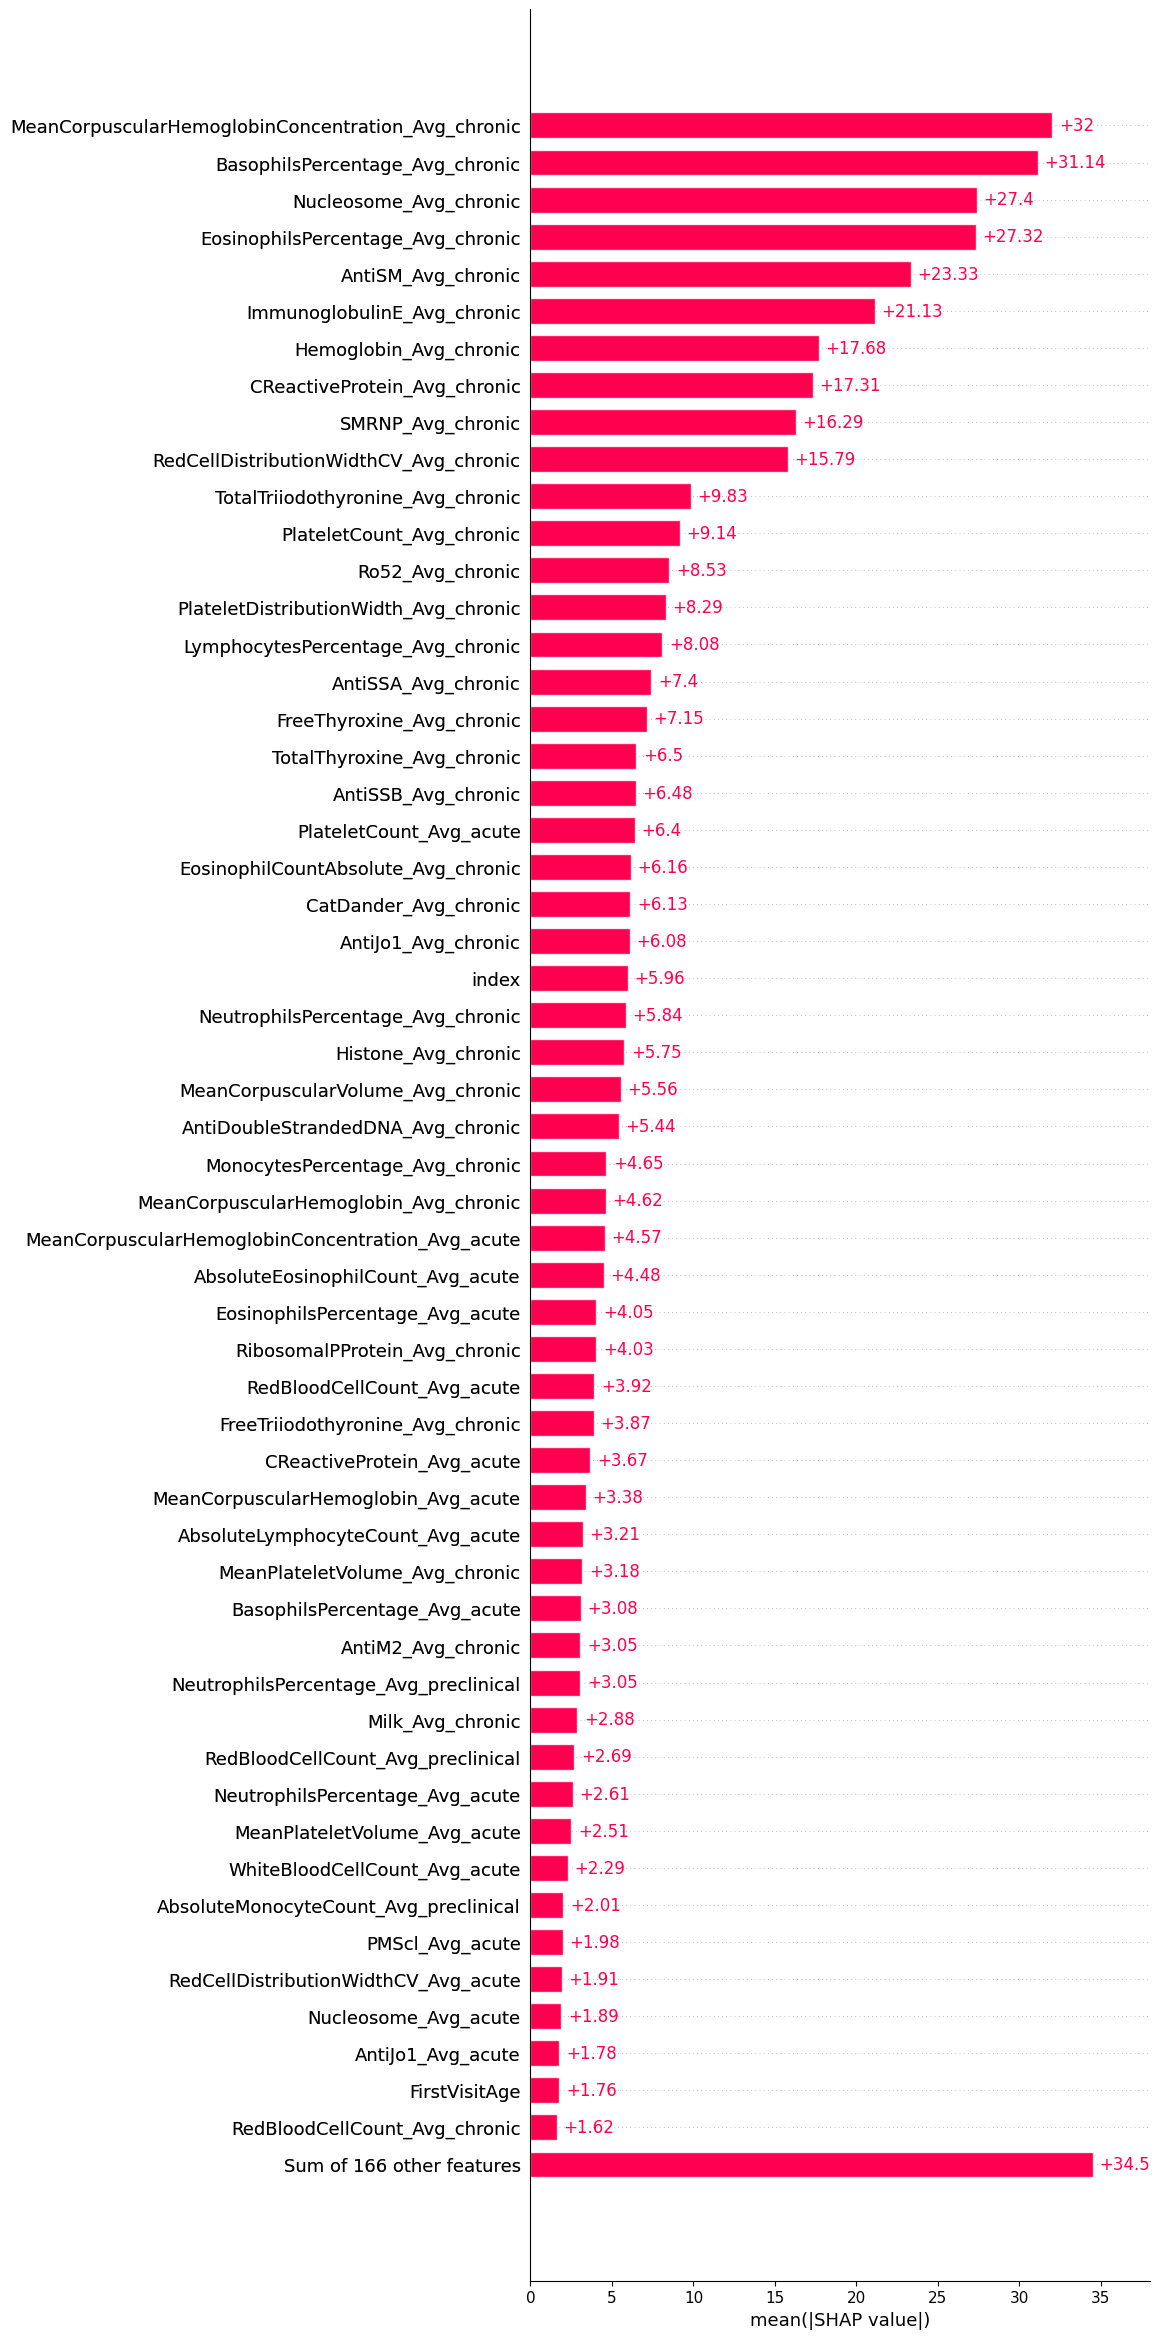

In [32]:
shap.plots.bar(shap_values, max_display=56)


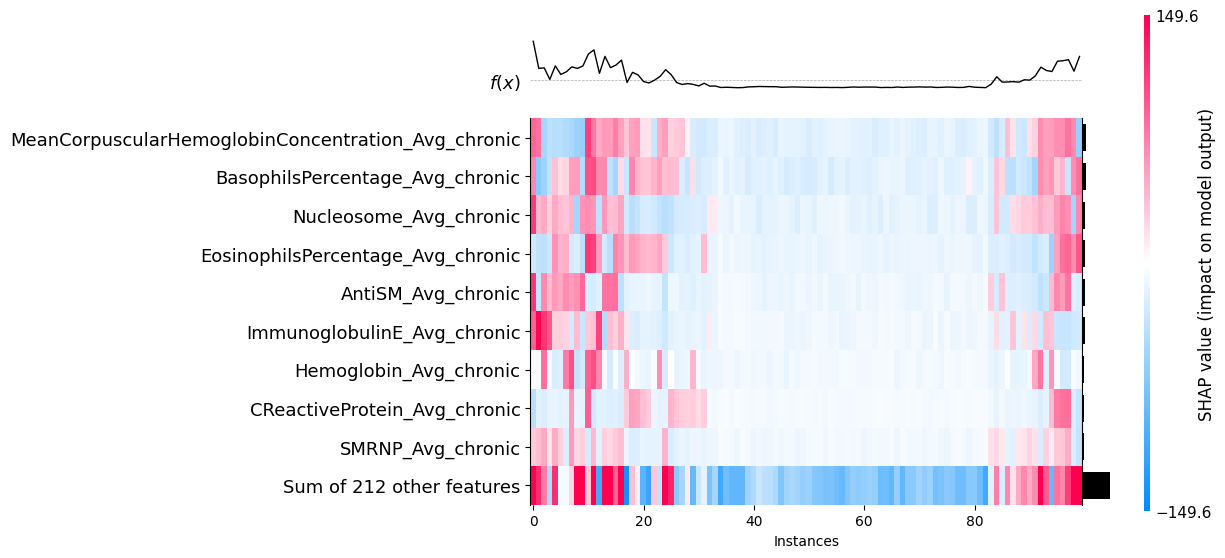

<Axes: xlabel='Instances'>

In [18]:
shap.plots.heatmap(shap_values[:1000])


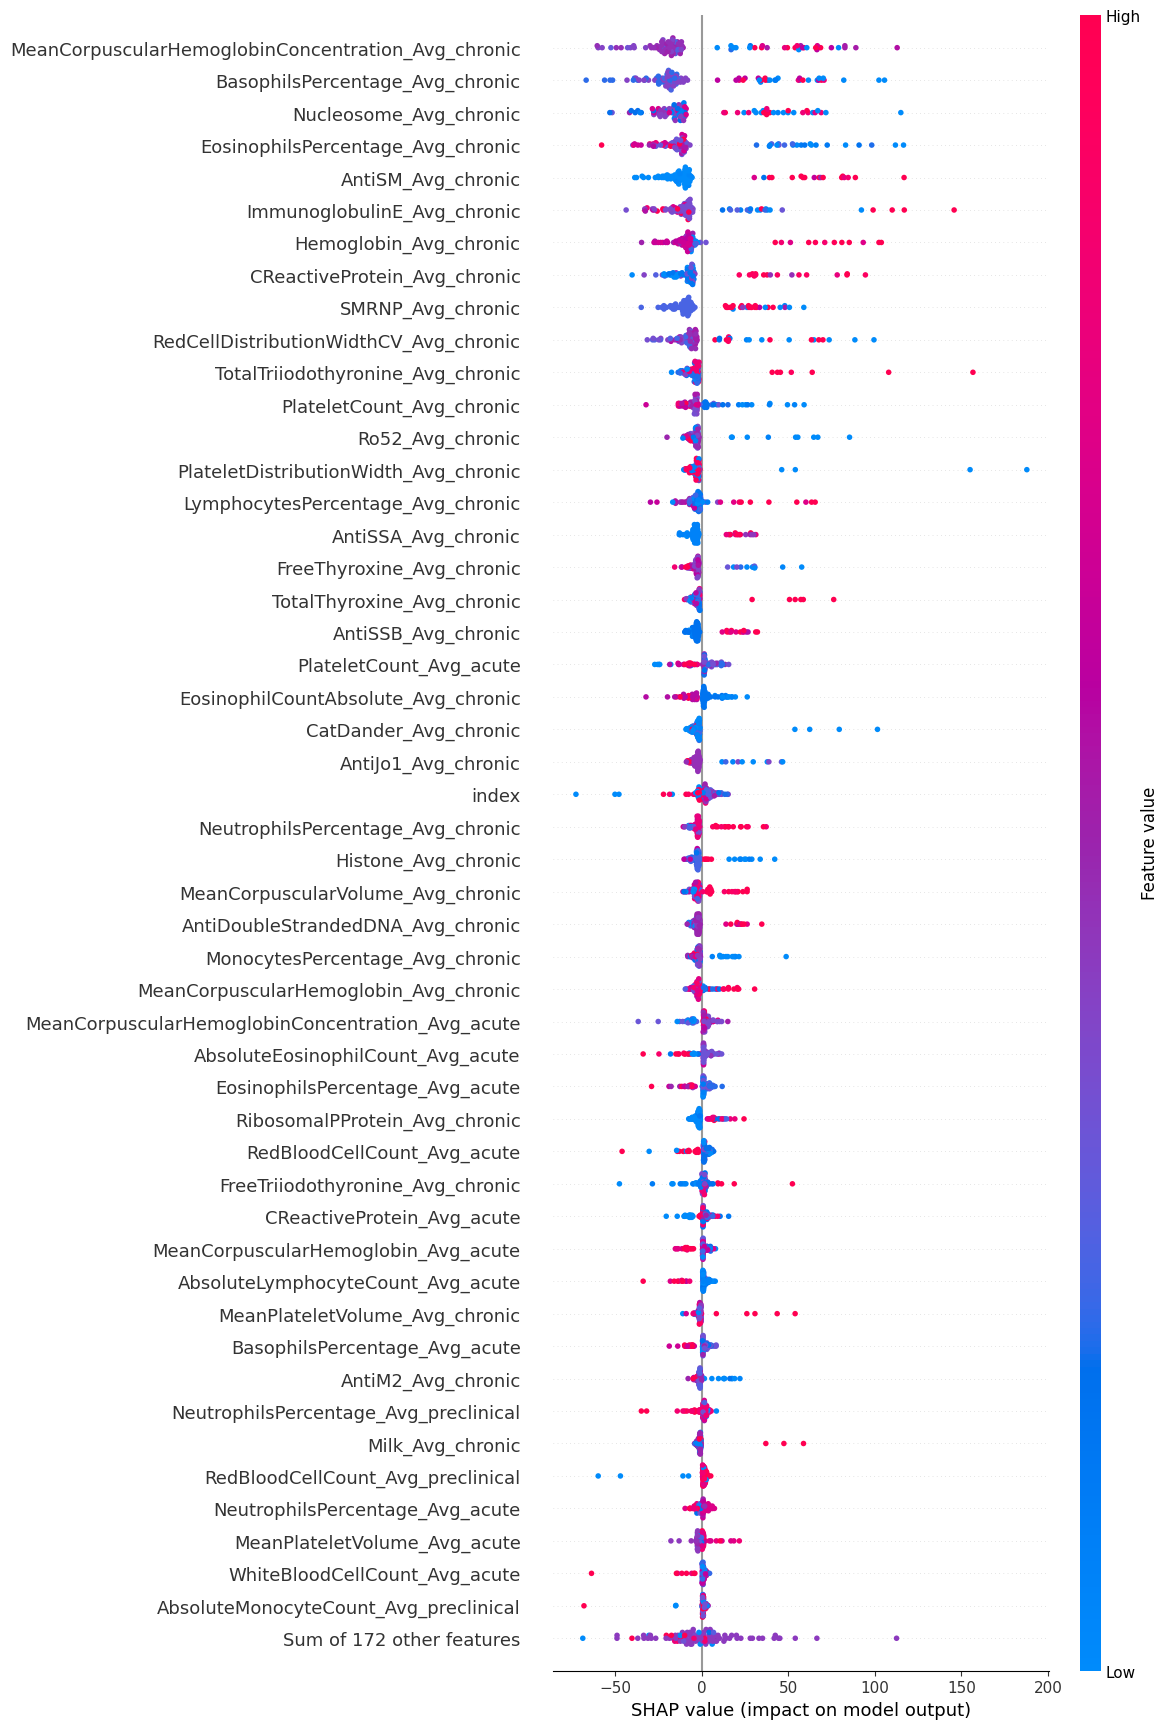

In [30]:
shap.plots.beeswarm(shap_values, max_display=50)
